In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import pickle
from matplotlib import pyplot as plt 

q1 LABEL_2
q2i LABEL_0
q3i LABEL_0
qual LABEL_1
qual LABEL_3
qual LABEL_5


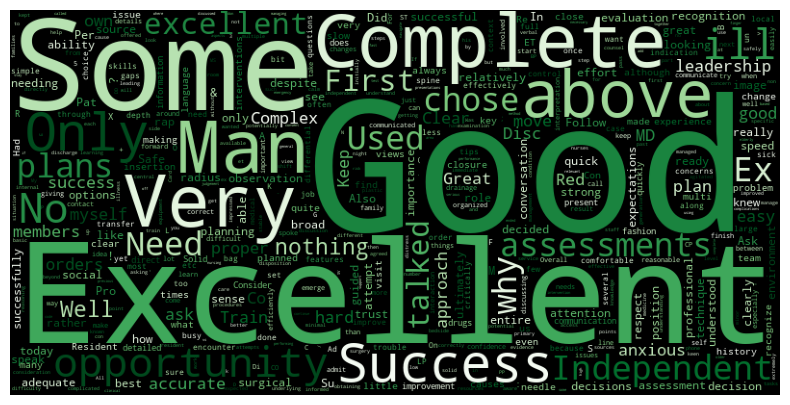

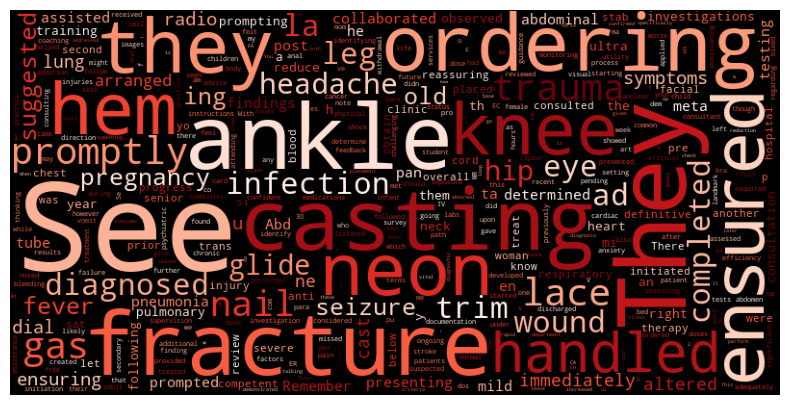

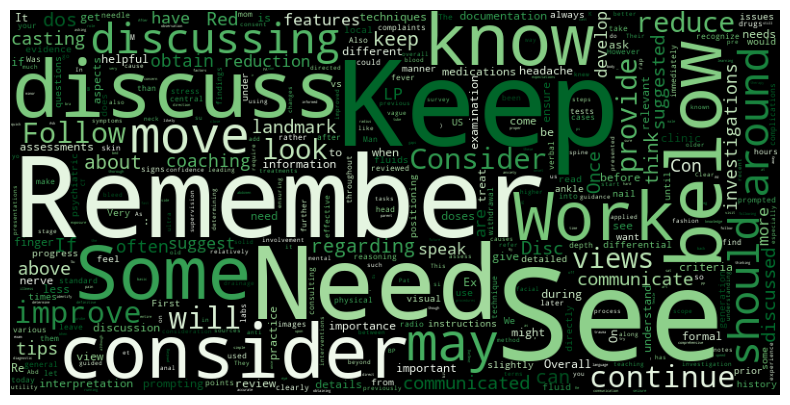

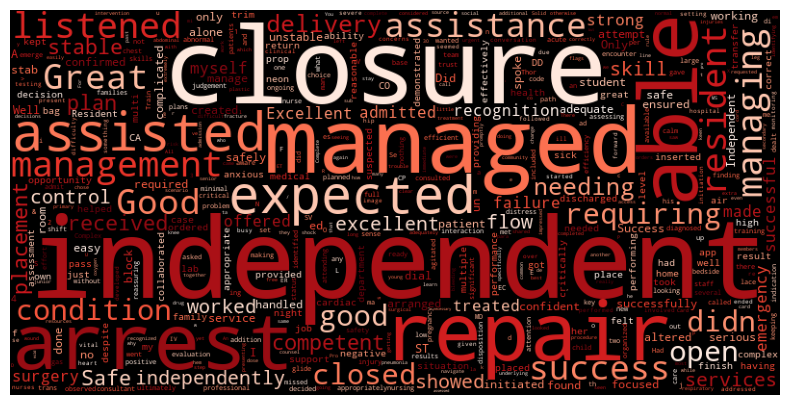

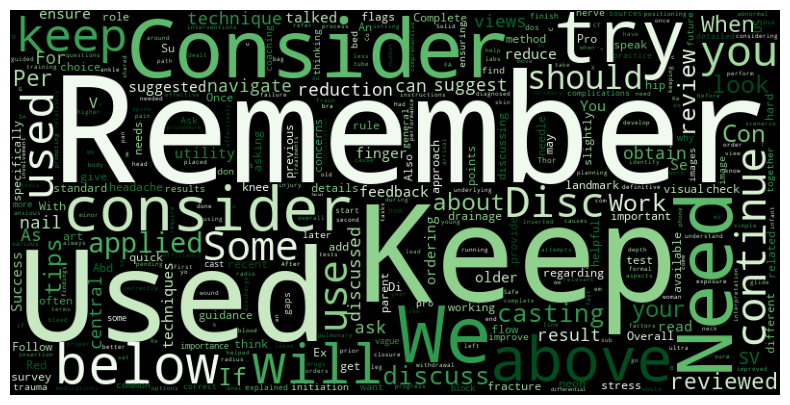

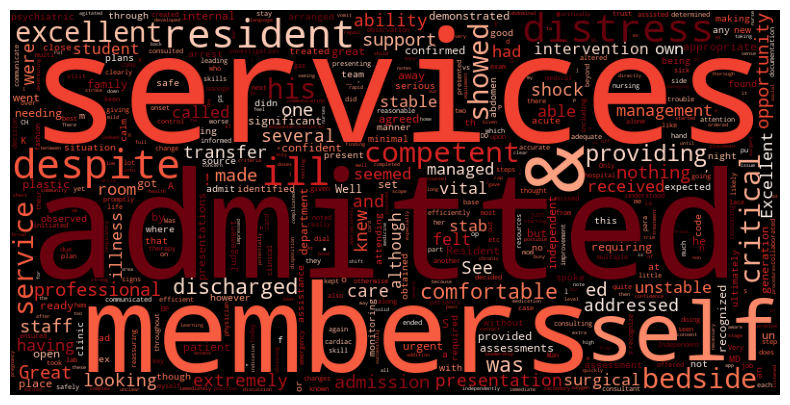

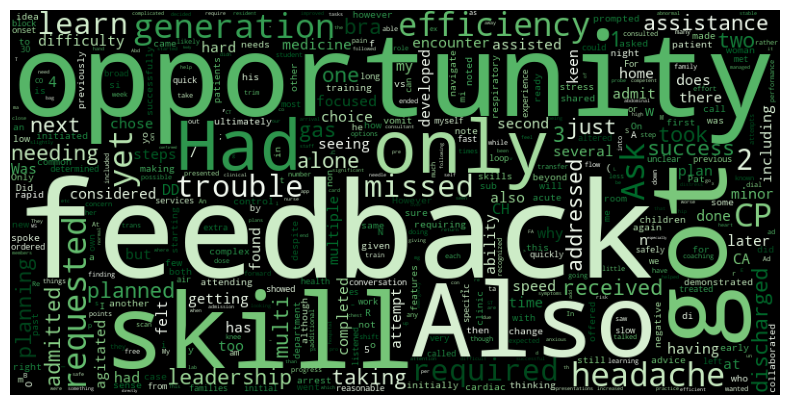

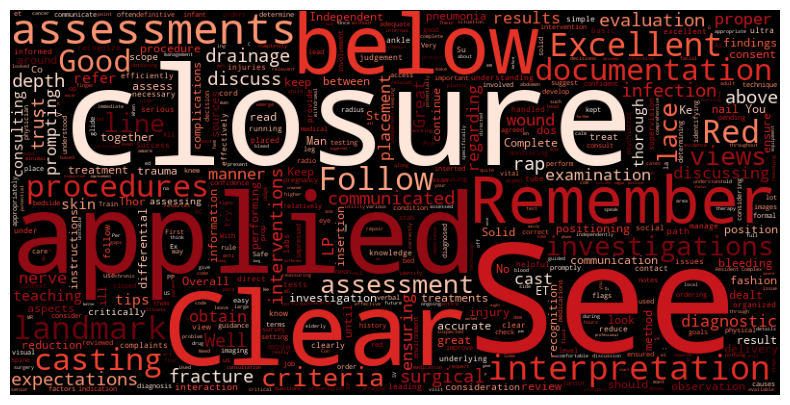

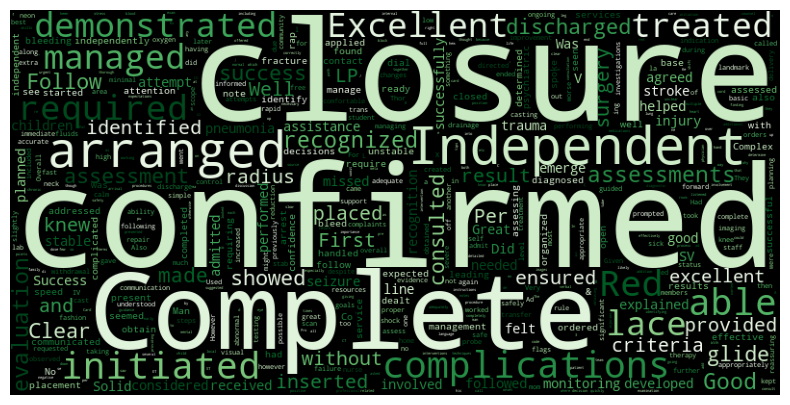

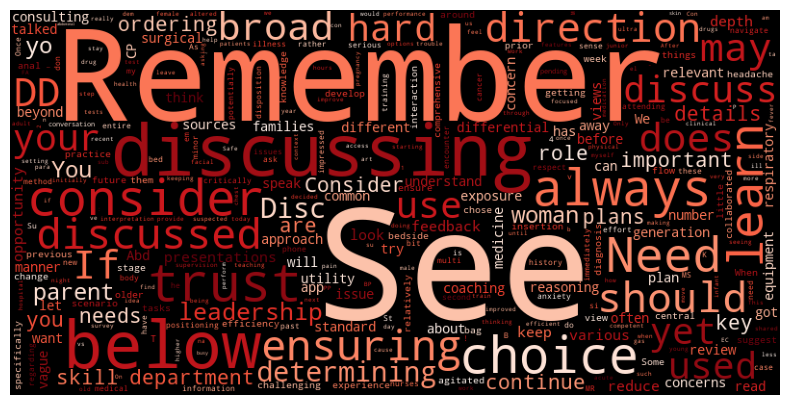

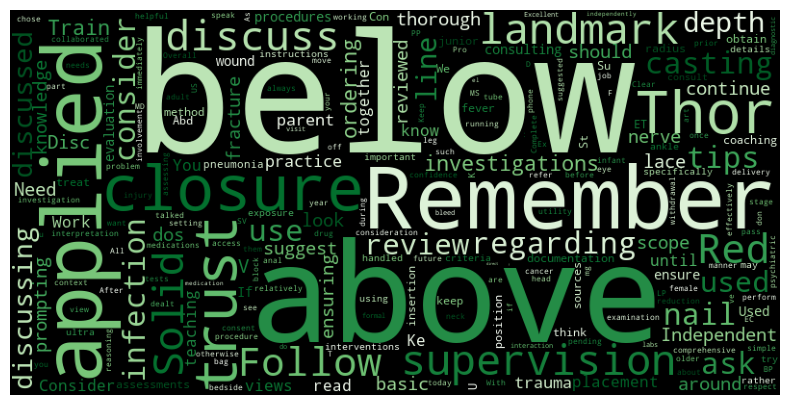

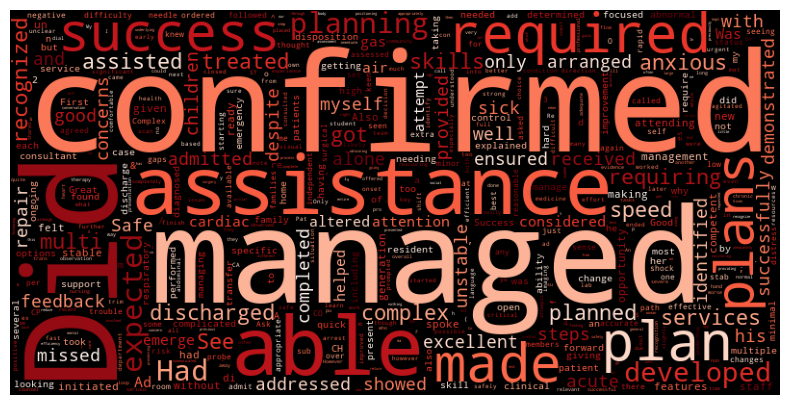

In [6]:
word_imports_dir = '../results/word_importances/'
token_thresh = 0
models = ['q1','q2i','q3i','qual']
reference_labels = [['LABEL_2'], ['LABEL_0'], ['LABEL_0'], ['LABEL_1','LABEL_3','LABEL_5']]
excluded_words = ['blank','EPA','OS','En']

MAX_WORDS = 500
COUNT_THRESH = 10
WIDTH = 800
HEIGHT = 400
FIGWIDTH = 10
FIGHEIGHT = 5
BG_COLOR = 'black'
CMAP_POS = 'Greens'
CMAP_NEG = 'Reds'
EXCL_PARTWORDS = True

def gen_wc_from_scores(word_scores, max_words=500, positive=True, 
    count_thresh=10, width=800, height=400, figwidth=10, figheight=5, 
    background_color='white', colormap='Reds',
    exclude_partwords=True):
    wc = WordCloud(max_words=max_words, background_color=background_color, colormap=colormap, width=width, height=height)
    if exclude_partwords:
        word_scores = word_scores[~word_scores.index.str.contains('##')]
    wc.generate_from_frequencies(
        word_scores[
            (word_scores['count'] >= count_thresh) &
            ((word_scores['mean'] >= 0) if positive else (word_scores['mean'] < 0))
        ]['mean'].abs().to_dict()
    )
    plt.figure(figsize=(figwidth, figheight))
    plt.imshow(wc)
    plt.axis('off')

for model, ref_labs in zip(models, reference_labels):
    for ref_lab in ref_labs:
        print(model, ref_lab)
        word_imports_file = f'{word_imports_dir}/min_token_thresh_{token_thresh}/{model}_{ref_lab}.pkl'
        with open(word_imports_file, 'rb') as f:
            word_imports = pickle.load(f)
        
        word_scores = {k : {'mean': np.mean(v), 'std': np.std(v), 'count': len(v)} for k, v in word_imports.items()}
        word_scores = pd.DataFrame(word_scores).T
        word_scores = word_scores.sort_values('mean')

        word_scores = word_scores.drop(excluded_words)

        gen_wc_from_scores(word_scores, max_words=MAX_WORDS, count_thresh=COUNT_THRESH,
                           width=WIDTH, height=HEIGHT, figwidth=FIGWIDTH, figheight=FIGHEIGHT,
                           background_color=BG_COLOR, colormap=CMAP_POS, exclude_partwords=EXCL_PARTWORDS,
                           positive=True)
        
        plt.savefig(f'{word_imports_dir}/min_token_thresh_{token_thresh}/{model}_{ref_lab}_mincount_{COUNT_THRESH}_positive.svg',
                    bbox_inches='tight', pad_inches=0.0)

        gen_wc_from_scores(word_scores, max_words=MAX_WORDS, count_thresh=COUNT_THRESH,
                           width=WIDTH, height=HEIGHT, figwidth=FIGWIDTH, figheight=FIGHEIGHT,
                           background_color=BG_COLOR, colormap=CMAP_NEG, exclude_partwords=EXCL_PARTWORDS,
                           positive=False)
        
        plt.savefig(f'{word_imports_dir}/min_token_thresh_{token_thresh}/{model}_{ref_lab}_mincount_{COUNT_THRESH}_negative.svg',
                    bbox_inches='tight', pad_inches=0.0)

In [85]:
word_imports_file = '../results/word_importances/min_token_thresh_5/q1_LABEL_2.pkl'
with open(word_imports_file, 'rb') as f:
    word_imports = pickle.load(f)

In [86]:

# word_scores = word_scores.reset_index().rename({'index': 'word'}, axis=1)
# word_scores.index = word_scores.index.str.replace('##', '-', regex=False)
# word_scores.loc[:, 'word'] = word_scores['word'].str.replace('##', '-', regex=False)

In [87]:
def gen_wc_from_scores(word_scores, max_words=500, positive=True, 
    count_thresh=10, width=800, height=400, figwidth=10, figheight=5, 
    background_color='white', colormap='Reds',
    exclude_partwords=True):
    wc = WordCloud(max_words=500, background_color=background_color, colormap=colormap, width=width, height=height)
    if exclude_partwords:
        word_scores = word_scores[~word_scores.index.str.contains('##')]
    wc.generate_from_frequencies(
        word_scores[
            (word_scores['count'] >= count_thresh) &
            ((word_scores['mean'] >= 0) if positive else (word_scores['mean'] < 0))
        ]['mean'].abs().to_dict()
    )

    plt.figure(figsize=(figwidth, figheight))
    plt.imshow(wc)
    plt.axis('off')

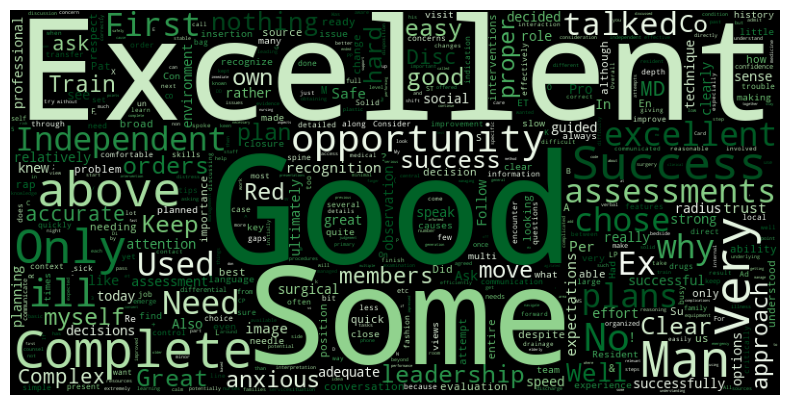

In [83]:
gen_wc_from_scores(word_scores, colormap='Greens', background_color='black', count_thresh=10)

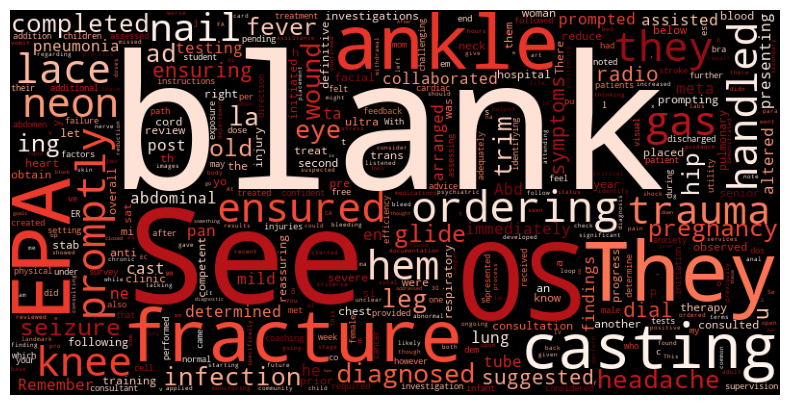

In [84]:
gen_wc_from_scores(word_scores, positive=False, colormap='Reds', background_color='black', count_thresh=10)

---

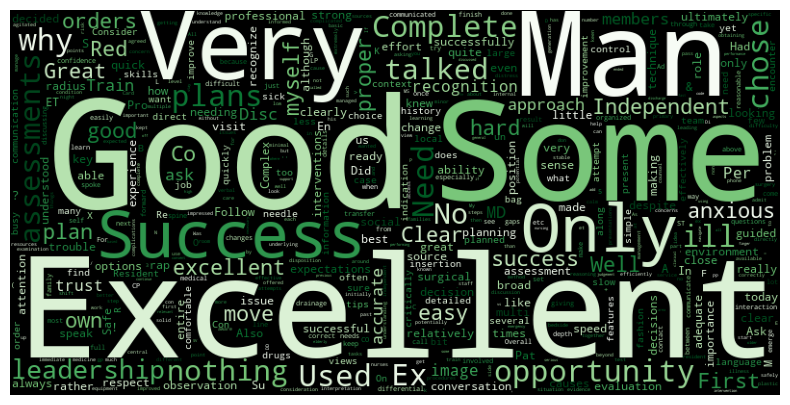

In [88]:
gen_wc_from_scores(word_scores, colormap='Greens', background_color='black', count_thresh=10)

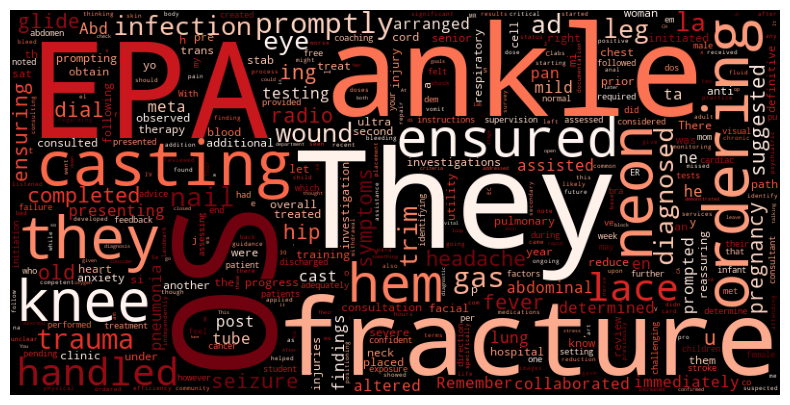

In [89]:
gen_wc_from_scores(word_scores, positive=False, colormap='Reds', background_color='black', count_thresh=10)